## Beer Recipe Analysis Part2

### Introduction

The analysis is about how different factors associated with the last stage of the homebrewing process. The project is based on the linear regression model and a thorough process is carried out to test the linear assumptions and evaluate the hypothesis made for this project.

The Part1 notebook mainly focuses on the background knowledge of beer homebrewing, the assumption made for this project, and how to preprocess the data. For this notebook, I will start building the regression model and test the model assumptions for linear regression model.

### Methodology
The Part1 Notebook
1. Data exploratory and cleaning
2. Handle the imbalanced data: Sampling
3. Split the data into training and testing set and standardized the predictors

The Part2 Notebook
2. Test assumptions and build a full model with all the x variables on the training set 
3. Evaluate the baseline model performance on the testing set

The Part3 Notebok
1. Remove outliers and influential observations on the training set
2. Remove the high VIF variables on the training set and obtain the final model
3. Compare two sets of model performance on the testing set 
4. The Model Interpretation and the Conclusion

### The code from previous Part1 notebook

In [444]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

trasformed_xtrain=pd.read_csv("trasformed_xtrain.csv")
trasformed_xtest=pd.read_csv("trasformed_xtest.csv")
y_train=pd.read_csv("y_train.csv")
y_test=pd.read_csv("y_test.csv")

## Part2

Before using the model to make the prediction, we have to make sure the model is a good representation of the observed data.
To achieve this goal, we can evaluate the model performance and perform the analysis to check the model assumptions. These are the 3 steps we can take to perform the analysis.

Step 1: Correlation Analysis to test the multicollinearity between x variables and linearity relationship between the y variable and x variables.

Step 2: Fit the model and evaluate the performance

Step 3: Apply the residual analysis to test the constant variance, independence, and normality.

### 1. Test Assumptions and Build the Model on Training Set

### Step1. Correlation Analysis: Testing Linearity and multicollinearity

We can learn the correlation of two variables from both the correlation table and the scatter plot, the correlation value shows the strength and direction for the linear association between 2 variables.

Before fitting the model, we can first use the correlation table between x variables to examine whether the multicollinearity exists and use the scatter plot to examine the linear relationship between y and the x-variables.



#### Test the Multicollinearity between x variables
Multicollinearity (or collinearity) is when two or more of the predictors in a regression model are moderately or
highly correlated with each other.

In [445]:
#correlation table between x variables
print("\n\n\nThe Correlation Table for Independent Variables")
np.round(trasformed_xtrain.corr(),3)




The Correlation Table for Independent Variables


,Size(L),OG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PrimaryTemp,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
Size(L),1.000,-0.035,-0.029,-0.031,-0.021,0.986,0.038,0.016,0.100,0.041,-0.016,0.086,-0.062,-0.015,-0.045
OG,-0.035,1.000,0.970,0.380,0.415,-0.030,0.238,0.591,0.103,-0.112,0.020,0.092,-0.038,-0.030,-0.073
ABV,-0.029,0.970,1.000,0.383,0.351,-0.024,0.246,0.566,0.112,-0.098,0.019,0.087,-0.021,-0.035,-0.084
IBU,-0.031,0.380,0.383,1.000,0.170,-0.029,0.133,0.220,-0.015,-0.052,-0.020,0.020,-0.014,-0.006,-0.008
Color,-0.021,0.415,0.351,0.170,1.000,-0.017,0.071,0.249,-0.008,-0.040,0.001,0.027,-0.016,-0.005,-0.018
BoilSize,0.986,-0.030,-0.024,-0.029,-0.017,1.000,0.045,-0.008,0.114,0.037,-0.018,0.099,-0.057,-0.027,-0.062
BoilTime,0.038,0.238,0.246,0.133,0.071,0.045,1.000,0.049,0.164,-0.029,-0.024,0.169,-0.033,-0.067,-0.172
BoilGravity,0.016,0.591,0.566,0.220,0.249,-0.008,0.049,1.000,-0.220,0.017,0.052,-0.184,-0.128,0.200,0.304
Efficiency,0.100,0.103,0.112,-0.015,-0.008,0.114,0.164,-0.220,1.000,-0.084,-0.066,0.440,0.110,-0.121,-0.735
MashThickness,0.041,-0.112,-0.098,-0.052,-0.040,0.037,-0.029,0.017,-0.084,1.000,-0.046,-0.202,0.134,0.066,0.097


When first eyeballing the correlation table, we can learn that some variables are highly correlated, such as "OG" and "ABV"  with correlated value 0.970, and "BoilSize" and "Size.L." with correlated value 0.986.  These correlated variables are potential factors that might cause multicollinearity and affect the prediction performance. Therefore, we might consider removing them when building the model (more detail about this topic on model building notebook.)


#### Test the Linearity between y variable and each x variable
If the linearity assumption is violated, misleading conclusions may occur however, the degree of the problem depends on the degree of non-linearity

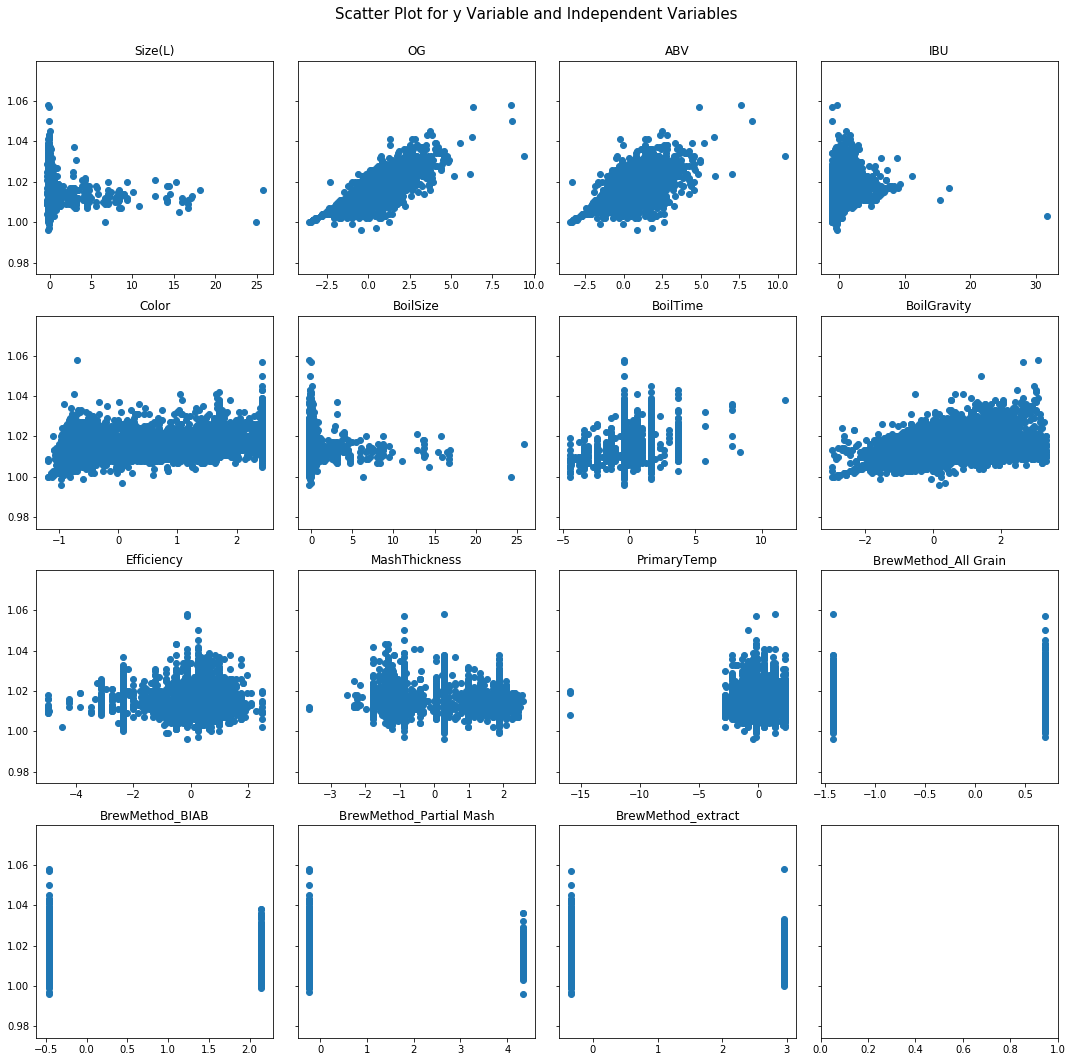

In [446]:
#plot scatter plot for y variable vs. x variables
f, axarr = plt.subplots(4, 4,figsize=(15,15),sharey=True)
for i in range(len(trasformed_xtrain.columns.values)):
    if i <4:
        axarr[0, i].scatter(trasformed_xtrain[["{}".format(trasformed_xtrain.columns.values[i])]],y_train)
        axarr[0, i].set_title("{}".format(trasformed_xtrain.columns.values[i]))
        #axarr[0, i].set_ylim([-6, 6])
    elif 4<=i<8:
        i1=i-4
        axarr[1, i1].scatter(trasformed_xtrain[["{}".format(trasformed_xtrain.columns.values[i])]],y_train)
        axarr[1, i1].set_title("{}".format(whole_beer.columns.values[i]))
    elif 8<=i<12:
        i2=i-8
        axarr[2, i2].scatter(trasformed_xtrain[["{}".format(trasformed_xtrain.columns.values[i])]],y_train)
        axarr[2, i2].set_title("{}".format(whole_beer.columns.values[i]))
    elif 12<=i<16:
        i3=i-12
        axarr[3, i3].scatter(trasformed_xtrain[["{}".format(trasformed_xtrain.columns.values[i])]],y_train)
        axarr[3, i3].set_title("{}".format(trasformed_xtrain.columns.values[i]))
  
f.suptitle("Scatter Plot for y Variable and Independent Variables",fontsize=15)        
plt.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

From the scatter plot we can learn whether the linear association exists between the y variable and x variable, and have a clearer picture of keeping which variable in the model during the model building stage.

The variable "OG", "ABV","Color",and "BoilGravity" seem to have the positive mild association with the y variable, and the variable "Boiltime" seems to have a positive weak association with the y variable. On the other hand, the variable "BrewMethod_All Grain", "BrewMethod_BIAB", "BrewMethod_Partial Mash", and "BrewMethod_extract" are  scattered along 0 and 1 because with the scatter plot you can only learn the linear relationship between Y and numerical variables, if the variable is the dummy variable you don’t see a linear relationship.


---



### Step2. Fit the Full Model First and Evaluate the Performance 

After splitting the data into the training set and testing set, we train the first model on the training set and evaluate the result to understand the baseline performance before modifying the model to satisfy the linear assumptions.

In [447]:
#Fitting standara linear regression model

#train model on training set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(trasformed_xtrain,y_train)

#make prediction on training set
p_train = linreg.predict(trasformed_xtrain)
error_train=y_train-p_train
abs_error_train=np.array(abs(y_train-p_train)).reshape(-1)
SSE_train=np.dot(abs_error_train,abs_error_train)
rmse_train=np.sqrt(SSE_train/(len(p_train)-(15+1))) # root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
standardized_residual_train=error_train/rmse_train


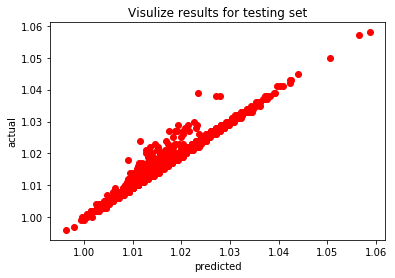

In [448]:
# Visulize results for testing set
%matplotlib inline
plt.plot(p_train, y_train,'ro')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Visulize results for testing set")
plt.show()

In [449]:
#results on training set 
from sklearn import metrics
mae_train = np.round(np.sum(abs_error_test)/(len(p_train)-(15+1)))
rmse_train=np.sqrt(SSE_train/(len(p_train)-(15+1))) # root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
r2_train=np.round(linreg.score(trasformed_xtrain,y_train),3)
adjr2_train = np.round(1-(1-r2_train)*(len(p_train)-1)/(len(p_train)-15-1),3)
print("Model performance on training set")
print("\nRoot Mean Squared Error:",rmse_train,"\nCoefficient of Determination:",r2_train,"\nadjusted r2:",adjr2_train)


#model statement on training set 
import statsmodels.api as sma


beer_xtrain1 = sma.add_constant(trasformed_xtrain)
lm1_train = sm.OLS(y_train,beer_xtrain1).fit()
print("Model statement on training set ")
lm1_train.summary()

Model performance on training set

Root Mean Squared Error: 0.0007375495726178687 
Coefficient of Determination: 0.979 
adjusted r2: 0.979
Model statement on training set 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FG   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.067e+04
Date:                Sat, 08 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:57:01   Log-Likelihood:                 52148.
No. Observations:                9000   AIC:                        -1.043e+05
Df Residuals:                    8985   BIC:                        -1.042e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0145   7.77e-06   1.31e+05      0.000       1.015       1.015
Size(L)                 -1.297e-05   4.81e-05     -0.270      0.787      -0.000    8.12e-05
OG                          0.0166   3.52e-05    470.788      0.000       0.016       0.017
ABV                        -0.0130   3.34e-05   -388.446      0.000      -0.013      -0.013
IBU                      1.104e-05   8.46e-06      1.305      0.192   -5.55e-06    2.76e-05
Color                    5.204e-05   8.81e-06      5.904      0.000    3.48e-05    6.93e-05
BoilSize                 3.469e-06    4.8e-05      0.072      0.942   -9.07e-05    9.76e-05
BoilTime                  2.31e-05   8.19e-06      2.822      0.005    7.06e-06    3.92e-05
BoilGravity              7.025e-06   1.16e-05      0.608      0.543   -1.56e-05    2.97e-05
Efficiency               1.575e-05    1.2e-05      1.309      0.191   -7.84e-06    3.93e-05
MashThickness            4.171e-06   8.02e-06      0.520      0.603   -1.16e-05    1.99e-05
PrimaryTemp             -2.111e-05   7.81e-06     -2.702      0.007   -3.64e-05    -5.8e-06
BrewMethod_All Grain     -1.33e-05   5.74e-06     -2.317      0.021   -2.45e-05   -2.05e-06
BrewMethod_BIAB         -6.337e-06   6.34e-06     -0.999      0.318   -1.88e-05    6.09e-06
BrewMethod_Partial Mash   2.38e-05   7.42e-06      3.208      0.001    9.26e-06    3.83e-05
BrewMethod_extract       1.149e-05   1.01e-05      1.137      0.256   -8.33e-06    3.13e-05
==============================================================================
Omnibus:                    10771.552   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2199837.271
Skew:                           6.198   Prob(JB):                         0.00
Kurtosis:                      78.581   Cond. No.                     4.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Evaluate the model performance on training set
We can evaluate the model performance with different metrics, such as rmse, R square and adjusted R square. 

The root mean square error for the regression model gives an estimate of the (overall) error standard deviation, the smaller the better. In our case the rmse is 0.0007, we can also see it as the standard deviation of the residuals.

Both the R square (Coefficient of Determination) and adjusted R square range from 0 to 1, and describe how well the regression line is in explaining the response y variable. They indicate the proportion of variability in y explained by x, if they are close to 1 then the regression line provides the good explanation of the data; if they are close to 0 then the regression line is not able to capture the variability of the data. In our case, since the R square is 0.98 it suggests that the regression line is able to capture 98% of the variability of the data.

adjusted R square is useful when comparing two models with a different set of x variables, a higher value in adjusted R square indicates a better model. Unlike R square, the adjusted R square does not increase with the addition of the x variable that does not improve the regression model. 


#### A goodness of fit for the model
The F test is the general indicator for the goodness of fit for the model. When the p-value of the F test is less than 0.05, we can reject the null hypothesis that suggests all the beta coefficient equals 0 and proves that at least one of the regression coefficients is non-zero and the model is a good fit. In our case, the p-value of the F test is less than 0, suggesting that we have a good start. 

#### Tests on individual coefficients: Find the x-variables that have a significant effect on Y
The variable "Color", "OG", "BoilGravity","ABV","BrewMethod_All Grain","BrewMethod_Partial Mash",and "PrimaryTemp" seem to significantly affect the dependent variable "FG" at 5% level since p values of the t-test on these individual parameters are all below 0.05, suggesting we can reject the null hypothesis that the x variable has no effect on y variable (reject the beta=0). Therefore, we should keep these variables in the model. 

With other x variables that are not significant to the model at 5% level, we can consider removing them when re-running the model.

Note that low p-values don’t necessarily identify predictor variables that are practically important.

### Step3.Residual Analysis

Residual analysis may display problems in the regression analysis and shows if there is some important variation in y that is not explained by the regression model. We can inspect 3 assuptions from the residual analysis:
1. Constant Variance (Homoscedasticity)
2. Independence: all the obsrvations randomly scattered around the zero line
3. Normality:Plot the normal probability plot of the residuals to test the normality

#### Testing Constant Variance and Independence

If constant variance and independence assumptions are violated regression line (least squares) estimates are still unbiased, however, confidence intervals, and prediction intervals will be incorrect.

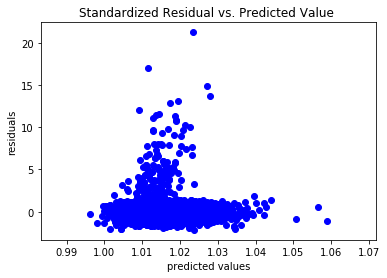

In [450]:
#Plot predicted vs standardized residuals value

plt.scatter(p_train, standardized_residual_train, c='b')
plt.title('Standardized Residual vs. Predicted Value ')
pl.xlabel('predicted values')
pl.ylabel('residuals')
plt.show()

#### For the constant variance and independence, we have to check whether points randomly scatter inside a band centered around the horizontal line at zero (the mean of the residuals), if there is a pattern then the assumptions do not hold. 

#### In the plot above, there are some observations cluster in the bottom of the plot, suggesting that there are potential outliers and there is an improvement we can make in the future.
---




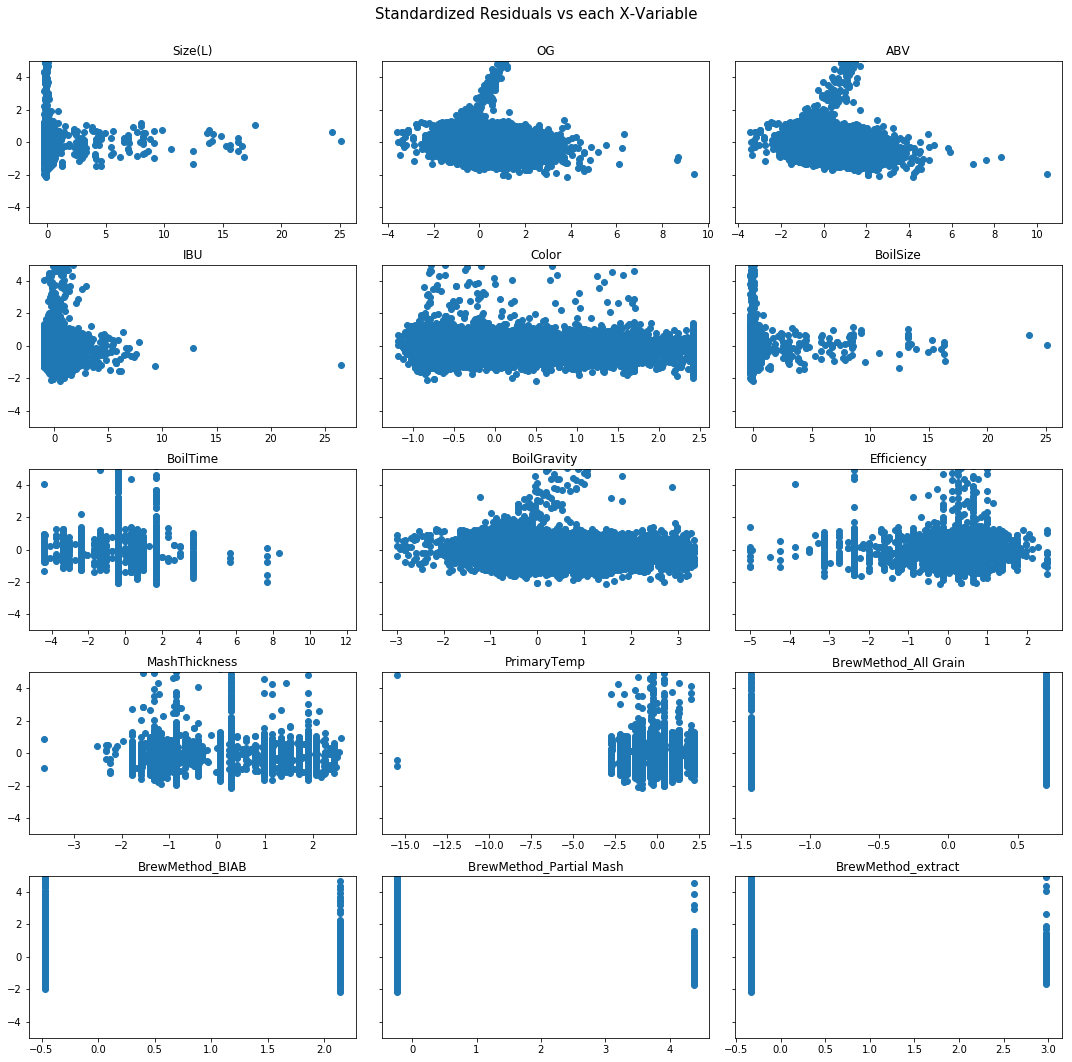

In [451]:
#Plot standardized residuals vs each x-variable

f, axarr = plt.subplots(5, 3,figsize=(15,15),sharey=True)
for i in range(len(x_train.columns.values)):
    if i <3:
        axarr[0, i].scatter(x_train[["{}".format(x_train.columns.values[i])]],standardized_residual_train)
        axarr[0, i].set_title("{}".format(x_train.columns.values[i]))
        axarr[0, i].set_ylim([-5, 5])
    elif 3<=i<6:
        i1=i-3
        axarr[1, i1].scatter(x_train[["{}".format(x_train.columns.values[i])]],standardized_residual_train)
        axarr[1, i1].set_title("{}".format(x_train.columns.values[i]))
    elif 6<=i<9:
        i2=i-6
        axarr[2, i2].scatter(x_train[["{}".format(x_train.columns.values[i])]],standardized_residual_train)
        axarr[2, i2].set_title("{}".format(x_train.columns.values[i]))
    elif 9<=i<12:
        i3=i-9
        axarr[3, i3].scatter(x_train[["{}".format(x_train.columns.values[i])]],standardized_residual_train)
        axarr[3, i3].set_title("{}".format(x_train.columns.values[i]))
    elif 12<=i<15:
        i4=i-12
        axarr[4, i4].scatter(x_train[["{}".format(x_train.columns.values[i])]],standardized_residual_train)
        axarr[4, i4].set_title("{}".format(x_train.columns.values[i]))

f.suptitle("Standardized Residuals vs each X-Variable",fontsize=15)        
plt.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()


#### For the plot above, we can find that some of the plots have a funnel patterns, such as "OG", "ABV","BoilGravity","IBU" and "MashThickness". The funnel pattern suggests that the data violate the independence and constant variance


#### Tesing Normality Assuptions
If normality assumption is violated regression line (least squares) estimates are still unbiased, however, confidence intervals, and prediction intervals will be incorrect.

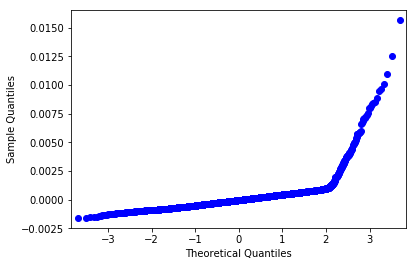

In [452]:
#Testing the normality assuption

import statsmodels.api as sm
res = lm1_train.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### For the normality assumption, we hope the observation can form a straight line (ideally 45 degree) on the normal probability plot. For the plot above, we cannot see a straight line, therefore, there are some improvements we can make in the next stage.


### 3. Evaluate the model performance on testing set

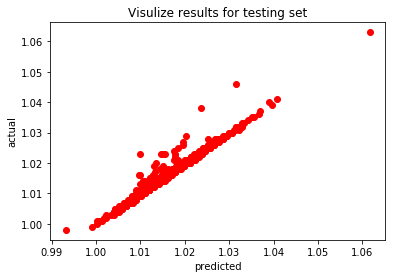

Performance on testing set

Mean Absolute Error: 0.0004499814254781404 
Root Mean Squared Error: 0.0009171888081576032 
Coefficient of Determination: 0.9705239887555936 
adjusted r2: 0.9703260746245882 
Fstatistic: 4854.561932753852


In [453]:


#make prediction on testing set
p_test = linreg.predict(trasformed_xtest)
error_test=y_test-p_test
abs_error_test=np.array(abs(y_test-p_test)).reshape(-1)

# Visulize results for testing set
%matplotlib inline
plt.plot(p_test, y_test,'ro')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Visulize results for testing set")
plt.show()

#results on testing set 
mae_test = np.sum(abs_error_test)/(len(p_test)-(15+1))
SSE_test=np.dot(abs_error_test,abs_error_test)
rmse_test=np.sqrt(SSE_test/(len(p_test)-(15+1))) # root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
standardized_residual_test=error_test/rmse_test
r2_test=linreg.score(trasformed_xtest,y_test)
adjr2_test = 1-(1-r2_test)*(len(p_test)-1)/(len(p_test)-15-1)

y_mean_test=np.repeat(np.array([np.mean(y_test)]),2250,axis=0)
SSR_test=np.dot((y_mean_test-p_test).T,(y_mean_test-p_test))
MSR_test=SSR_test/15
MSE_test=SSE_test/(len(p_test)-(15+1))
F_statistic_test=MSR_test/MSE_test

print("Performance on testing set")
print("\nMean Absolute Error:",mae_test,"\nRoot Mean Squared Error:",rmse_test,"\nCoefficient of Determination:",r2_test,"\nadjusted r2:",adjr2_test,"\nFstatistic:",float(F_statistic_test))



#### After testing the assumptions for the linear regression model and fitting the full model on the training set, we can then evaluate the model on testing set. 

As we continue building the new model on the training set, we can evaluate these model performance on the testing set to select the final optimal model that yields the best performance. 

For the performance above, we can see it as the baseline performance since the model learns from the training set that has not been modified, as we continue building new models on next notebook we will start removing outliers and independent variables that are not significant to the y variable to improve the performance, then we can compare the model performance on testing set to select the final model.